# Project: Identifying and Clustering Similar Manufacturing Issues/Defects

## Overview
This project aims to identify and group similar issues or defects in a manufacturing context. By leveraging a combination of natural language processing (NLP) for text data and machine learning techniques for clustering, we can categorize and analyze defects that have been reported in manufacturing systems. The goal is to automate the detection of similar issues, which will help improve response times, troubleshooting, and defect analysis.

## Dataset
The dataset consists of 961 records related to manufacturing issues. The columns include:

System (Level 1): The broad category of the system where the issue was observed (e.g., "Headrest Assembly").
Subsystem (Level 2): The more specific component or subsystem involved.
Component (Level 3): The exact part of the subsystem that encountered the defect.
Summary: A brief summary of the issue.
Description: A detailed explanation of the issue.
Failure Mode: The specific failure mode associated with the defect.
Root Cause: The underlying cause of the defect.
Environment: The conditions under which the issue occurred.
FFF Framework: Framework classification related to the defect.

## Steps Involved in the Project
#### 1. Handling Missing Values
Missing values in the dataset were handled using appropriate strategies:
Mode Imputation for categorical columns (System (Level 1), Subsystem (Level 2), Component (Level 3)).
Placeholder Imputation for text columns (Description, Root_Cause, Environment, FFF Framework).
Dropping Missing Target Values (Failure_Mode), as this is the target variable for clustering.
#### 2. Feature Engineering
Three new features—System (Level 1), Sub-system (Level 2), and Component (Level 3)—were added to enrich the dataset for better performance. The text features (Summary, Description, Failure_Mode, Root_Cause) were combined and vectorized using the TF-IDF technique. Categorical columns were processed using Label Encoding. The combined text and encoded categorical data provided a comprehensive representation of each issue.
#### 3. Vectorization
The text data (summarized and descriptive features) was converted into numerical vectors using TF-IDF vectorizer. This helps capture the importance of each term in relation to the entire dataset.
Categorical data was converted into numerical values using encoding techniques (e.g., One-Hot Encoding for categorical features and Label Encoding for ordinal features).
#### 4. Clustering (K-Means Algorithm)
The K-Means clustering algorithm was applied to group similar defects based on both the text features and encoded categorical data. The number of clusters was set to 5, but this can be adjusted based on the dataset's characteristics.
Each record in the dataset was assigned to one of the clusters, facilitating easy identification of similar issues.
#### 5. Similarity Measure
Cosine Similarity was used to compare a new issue with existing issues in the dataset. By calculating the cosine similarity between the new issue’s vector and the dataset’s vectors, we could identify the top 5 most similar issues.
#### 6. Dimensionality Reduction (PCA)
Principal Component Analysis (PCA) was applied to reduce the high-dimensional feature space and make it easier to visualize the clustering results.
The reduced dimensions were plotted on a 2D scatter plot, where the points are colored by cluster labels.
#### 7. Visualization
A PCA-based scatter plot was generated to visually explore the clustering results. This helps in understanding how the clusters are distributed in the 2D feature space and aids in visualizing similarities between different issues.
Key Features:
Automatic Similarity Detection: By clustering and measuring similarity, the system can automatically identify similar defects/issues from a new input.
Scalability: The approach can be easily scaled to handle larger datasets in manufacturing settings, offering a tool for automatic defect analysis.
Text & Categorical Data Handling: The project efficiently integrates both unstructured text data (issue descriptions) and structured categorical data (system, component, environment) into the analysis.
Future Improvements:
Hyperparameter Tuning: Experiment with different numbers of clusters in the K-Means algorithm to improve clustering quality.
Advanced Text Vectorization: Consider using more advanced NLP techniques like Word2Vec, GloVe, or Transformer-based models (e.g., BERT) to capture deeper semantic relationships in the text data.
Interactive Dashboard: Build an interactive dashboard to visualize clusters, trends, and explore defects based on user inputs.
Conclusion
This project demonstrates how we can use machine learning and natural language processing to automatically identify and group similar defects/issues in a manufacturing environment. By clustering similar issues, manufacturers can speed up defect resolution and gain insights into common failure modes, ultimately improving product quality and manufacturing efficiency.

#### Libraries in the Project:
Python Libraries: pandas, numpy, scikit-learn, matplotlib
Machine Learning: K-Means, PCA
NLP: TF-IDF vectorization


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\vivek_\Downloads\Aescape-data.csv")

In [3]:
df.head()

,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project lead id,Priority,...,Comment.37,Comment.38,Comment.39,Parent,Parent summary,Status Category,Status Category Changed,Failure Modes and Components,Other Interesting Insights,Resolutions from Comments/Description
0,SITC-250,34136,Task,Closed,SITC,Supplier Issue Tracking - Compal,software,Nick Nelson,712020:20f065d9-e44b-4f2d-9906-f57ed6684f3a,Critical,...,NaN,NaN,NaN,NaN,NaN,Done,18/Sep/24 6:34 PM,Failure Modes and Components:\n1. E-Stop didn’...,```\nOther Interesting Insights:\n1. The issue...,No resolutions found.
1,SITC-202,33788,Bug,Closed,SITC,Supplier Issue Tracking - Compal,software,Nick Nelson,712020:20f065d9-e44b-4f2d-9906-f57ed6684f3a,Major,...,NaN,NaN,NaN,NaN,NaN,Done,20/Aug/24 1:21 AM,Failure Modes and Components:\n1. The torque v...,Other Interesting Insights:\n1. The engineer i...,Resolutions:\n1. Update the torque value in SO...
2,PI-724,35953,Bug,Monitoring,PI,Product Issues,software,Nick Nelson,712020:20f065d9-e44b-4f2d-9906-f57ed6684f3a,Critical,...,NaN,NaN,NaN,NaN,NaN,In Progress,05/Sep/24 12:29 PM,Failure Modes and Components:\n1. One left tou...,Other Interesting Insights:\n1. The issue was ...,Resolutions:\n1. Added to Polyzen Touchpoint D...
3,PI-667,35337,Bug,Investigating,PI,Product Issues,software,Nick Nelson,712020:20f065d9-e44b-4f2d-9906-f57ed6684f3a,Major,...,NaN,NaN,NaN,NaN,NaN,In Progress,01/Aug/24 12:29 PM,Failure Modes and Components:\n1. Franka UI in...,Other Interesting Insights:\n1. The issue occu...,Resolutions:\n1. Rebooting the arm through Fra...
4,FQ-23,38233,Install Issue,To Do,FQ,Field Quality,business,Marisol Mason,712020:e83b9ee6-ef61-492b-b214-7aea846cd4e3,Standard,...,NaN,NaN,NaN,NaN,NaN,To Do,18/Sep/24 12:43 PM,No failure modes or components found.,```\nNo additional insights found.\n```,No resolutions found.


In [4]:
print(df.columns)

Index(['Issue key', 'Issue id', 'Issue Type', 'Status', 'Project key',
       'Project name', 'Project type', 'Project lead', 'Project lead id',
       'Priority',
       ...
       'Comment.37', 'Comment.38', 'Comment.39', 'Parent', 'Parent summary',
       'Status Category', 'Status Category Changed',
       'Failure Modes and Components', 'Other Interesting Insights',
       'Resolutions from Comments/Description'],
      dtype='object', length=524)


In [5]:
print(df.columns.tolist())

['Issue key', 'Issue id', 'Issue Type', 'Status', 'Project key', 'Project name', 'Project type', 'Project lead', 'Project lead id', 'Priority', 'Resolution', 'Assignee', 'Assignee Id', 'Reporter', 'Reporter Id', 'Creator', 'Creator Id', 'Created', 'Updated', 'Last Viewed', 'Resolved', 'Affects versions', 'Affects versions.1', 'Fix versions', 'Components', 'Components.1', 'Components.2', 'Due date', 'Votes', 'Labels', 'Labels.1', 'Labels.2', 'Labels.3', ' Fix Description', 'Summary', 'Description', 'cleaned_description', 'links', 'All Comments', 'Components_Matin Extracted New', 'Component (Child)_India_Team', 'US Team_components', 'Area of Failure (Parent)_India Team', 'Part Nos_India Team', 'US team Part Nos', 'US team name', 'Keywords', 'Wild Card(any Area/part/software) ', 'Name', 'Failure_Mode', 'Root_Cause', 'Countermeasure', 'Resolutions', 'Environment', 'FFF Framework', 'Design/Manufacturing/Quality/Process', 'Mechanical/Electrical/Software/Other', 'Specs', 'Watchers', 'Watchers

### Handling Missing Values

In [6]:
null_columns = df.columns[df.isnull().all()] 

In [7]:
null_columns

Index([' Additional Service Desc)', ' Affected hardware)',
       ' Affected services)', ' Arena Reference)', ' Assumptions)',
       ' Atlas goals)', ' Atlas project)', ' Backout plan)', ' Begin Date)',
       ' Body Area)',
       ...
       ' Target end)', ' Target start)', ' Team)', ' Test plan)',
       ' Testing Notes)', ' Time Horizon)', ' Time to close after resolution)',
       ' Time to first response)', ' Time to resolution)',
       ' Time to review normal change)'],
      dtype='object', length=191)

In [8]:
df_cleaned = df.drop(columns=null_columns)

In [9]:
df_cleaned

,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project lead id,Priority,...,Comment.37,Comment.38,Comment.39,Parent,Parent summary,Status Category,Status Category Changed,Failure Modes and Components,Other Interesting Insights,Resolutions from Comments/Description
0,SITC-250,34136,Task,Closed,SITC,Supplier Issue Tracking - Compal,software,Nick Nelson,712020:20f065d9-e44b-4f2d-9906-f57ed6684f3a,Critical,...,NaN,NaN,NaN,NaN,NaN,Done,18/Sep/24 6:34 PM,Failure Modes and Components:\n1. E-Stop didn’...,```\nOther Interesting Insights:\n1. The issue...,No resolutions found.
1,SITC-202,33788,Bug,Closed,SITC,Supplier Issue Tracking - Compal,software,Nick Nelson,712020:20f065d9-e44b-4f2d-9906-f57ed6684f3a,Major,...,NaN,NaN,NaN,NaN,NaN,Done,20/Aug/24 1:21 AM,Failure Modes and Components:\n1. The torque v...,Other Interesting Insights:\n1. The engineer i...,Resolutions:\n1. Update the torque value in SO...
2,PI-724,35953,Bug,Monitoring,PI,Product Issues,software,Nick Nelson,712020:20f065d9-e44b-4f2d-9906-f57ed6684f3a,Critical,...,NaN,NaN,NaN,NaN,NaN,In Progress,05/Sep/24 12:29 PM,Failure Modes and Components:\n1. One left tou...,Other Interesting Insights:\n1. The issue was ...,Resolutions:\n1. Added to Polyzen Touchpoint D...
3,PI-667,35337,Bug,Investigating,PI,Product Issues,software,Nick Nelson,712020:20f065d9-e44b-4f2d-9906-f57ed6684f3a,Major,...,NaN,NaN,NaN,NaN,NaN,In Progress,01/Aug/24 12:29 PM,Failure Modes and Components:\n1. Franka UI in...,Other Interesting Insights:\n1. The issue occu...,Resolutions:\n1. Rebooting the arm through Fra...
4,FQ-23,38233,Install Issue,To Do,FQ,Field Quality,business,Marisol Mason,712020:e83b9ee6-ef61-492b-b214-7aea846cd4e3,Standard,...,NaN,NaN,NaN,NaN,NaN,To Do,18/Sep/24 12:43 PM,No failure modes or components found.,```\nNo additional insights found.\n```,No resolutions found.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,SUS-225,36675,Epic,To Do,SUS,Sustaining,software,Li Wei,712020:10ee2342-a60b-4b97-87a1-387d3a99c4d7,Standard,...,NaN,NaN,NaN,NaN,NaN,To Do,19/Aug/24 11:47 AM,No failure modes or components found.,```\nNo additional insights found.\n```,No resolutions found.
957,SUS-226,36680,Epic,To Do,SUS,Sustaining,software,Li Wei,712020:10ee2342-a60b-4b97-87a1-387d3a99c4d7,Standard,...,NaN,NaN,NaN,NaN,NaN,To Do,19/Aug/24 12:53 PM,No failure modes or components found.,```\nNo additional insights found.\n```,No resolutions found.
958,PI-834,37708,Bug,Queued,PI,Product Issues,software,Nick Nelson,712020:20f065d9-e44b-4f2d-9906-f57ed6684f3a,Major,...,NaN,NaN,NaN,NaN,NaN,In Progress,14/Sep/24 4:45 PM,Failure Modes and Components:\n1. Uncomfortabl...,Other Interesting Insights:\n1. The member's b...,No resolutions found.
959,SUS-265,37963,Epic,In Progress,SUS,Sustaining,software,Li Wei,712020:10ee2342-a60b-4b97-87a1-387d3a99c4d7,Critical,...,NaN,NaN,NaN,NaN,NaN,In Progress,11/Sep/24 3:33 PM,No failure modes or components found.,```\nNo additional insights found.\n```,No resolutions found.


In [10]:
keep_columns = ['Summary', 'Description', 'Failure_Mode', 'Root_Cause', 'Environment', 'FFF Framework']

In [11]:
df_cleaned = df[keep_columns]

In [12]:
df_cleaned

,Summary,Description,Failure_Mode,Root_Cause,Environment,FFF Framework
0,E-Stop on table 1231545400003 doesn't trigger ...,During provisioning E-Stop didn’t work on tabl...,"E-Stop didn’t work on table 1231545400003, pin...",Armrest cable connector not being fully plugge...,Testing,Function
1,DVT Build | Torque value adjustment for 690-00...,"MFG-000006, Page.8\n\nThe torque values for 69...",The torque values are too big and will risk da...,torque values are too big,Field Operation,Form
2,DVT- Touchpoint dovetail not installed properl...,One left touchpoint (T0XS2426000031) was not i...,One left touchpoint was not installed with the...,NaN,Production,Function
3,Franka UI incorrectly reporting that e-stop is...,Context:\n[<slack conversation>|https://aescap...,Franka UI incorrectly reporting that e-stop is...,NaN,Product Engineering,Function
4,DVT012 - Left dovetail installed on right arm,This arm was tagged as a right arm but had a l...,right touch point could not be installed to th...,arm was tagged as a right arm but had a left d...,Installation,Function
...,...,...,...,...,...,...
956,Design for Install,NaN,Design for Install,NaN,Production,Fit
957,Bellows Improvements,NaN,Bellows Improvements,NaN,Production,Form
958,Massage Tickling Member,"On occasion, it has been reported that the mas...",uncomfortable for the member,massage can result in a tickling feeling.,Field Operation,Function
959,Franka Self Test Failures (HW),NaN,Franka Self Test Failures (HW),NaN,Testing,Function


In [13]:
df_cleaned.isnull().sum()

Summary            0
Description      211
Failure_Mode      92
Root_Cause       592
Environment      142
FFF Framework    241
dtype: int64

#### Feature Engineering

In [15]:
# Working with a copy of df_cleaned to avoid SettingWithCopyWarning
df_cleaned = df_cleaned.copy()

# Add the new features/ columns using .loc
df_cleaned.loc[:, 'System (Level 1)'] = None
df_cleaned.loc[:, 'Subsystem (Level 2)'] = None
df_cleaned.loc[:, 'Component (Level 3)'] = None

# Reorder the columns to make the new columns the first three
df_cleaned = df_cleaned[['System (Level 1)', 'Subsystem (Level 2)', 'Component (Level 3)'] + [col for col in df_cleaned.columns if col not in ['System (Level 1)', 'Subsystem (Level 2)', 'Component (Level 3)']]]


In [16]:
df_cleaned

,System (Level 1),Subsystem (Level 2),Component (Level 3),Summary,Description,Failure_Mode,Root_Cause,Environment,FFF Framework
0,None,None,None,E-Stop on table 1231545400003 doesn't trigger ...,During provisioning E-Stop didn’t work on tabl...,"E-Stop didn’t work on table 1231545400003, pin...",Armrest cable connector not being fully plugge...,Testing,Function
1,None,None,None,DVT Build | Torque value adjustment for 690-00...,"MFG-000006, Page.8\n\nThe torque values for 69...",The torque values are too big and will risk da...,torque values are too big,Field Operation,Form
2,None,None,None,DVT- Touchpoint dovetail not installed properl...,One left touchpoint (T0XS2426000031) was not i...,One left touchpoint was not installed with the...,NaN,Production,Function
3,None,None,None,Franka UI incorrectly reporting that e-stop is...,Context:\n[<slack conversation>|https://aescap...,Franka UI incorrectly reporting that e-stop is...,NaN,Product Engineering,Function
4,None,None,None,DVT012 - Left dovetail installed on right arm,This arm was tagged as a right arm but had a l...,right touch point could not be installed to th...,arm was tagged as a right arm but had a left d...,Installation,Function
...,...,...,...,...,...,...,...,...,...
956,None,None,None,Design for Install,NaN,Design for Install,NaN,Production,Fit
957,None,None,None,Bellows Improvements,NaN,Bellows Improvements,NaN,Production,Form
958,None,None,None,Massage Tickling Member,"On occasion, it has been reported that the mas...",uncomfortable for the member,massage can result in a tickling feeling.,Field Operation,Function
959,None,None,None,Franka Self Test Failures (HW),NaN,Franka Self Test Failures (HW),NaN,Testing,Function


In [17]:
df_cleaned.columns

Index(['System (Level 1)', 'Subsystem (Level 2)', 'Component (Level 3)',
       'Summary', 'Description', 'Failure_Mode', 'Root_Cause', 'Environment',
       'FFF Framework'],
      dtype='object')

In [18]:
# System (Level 1) values (no duplicates)

# Ensure you are working with a copy of df_cleaned
df_cleaned = df_cleaned.copy()

# Define the unique level_1_values
level_1_values = [
    "Headrest Assembly", "Camera Assembly", "Armrest Assembly", "Leg Bolster", "Matress",
    "Frame Assembly", "Internals", "Robot Assembly", "Exterior Housing", "Apparel", "Others"
]

# Fill the first 11 rows with the level_1_values
df_cleaned.loc[:10, 'System (Level 1)'] = level_1_values


In [19]:
level_2_values = [
    "Face Cradle", "Linkage System", "Linear Actuator", "Ball Screw", "ToF Camera", 
    "Camera And Enclosure Assy", "Lighting Unit", "Camera Base and Pole Assembly", 
    "Armrest Cushion", "Infotainment System", "Speaker Assembly", "Other", "E-Stop", 
    "Leg Cushion", "W-Bracket", "Foam", "Hardshell Base", "Upholstery", "Cable Management", 
    "Barebone Assembly", "Asm Frame Sub assembly", "Leg Bolster Drive Mechanism", 
    "Armrest Drive Mechanism", "Robot Rail Mechanism", "Bellows Assembly", "Computers/Controllers", 
    "Power Systems", "Robot Arm", "Robot Base", "End Effectors (Touchpoint/Dovetail)", 
    "Skin Panels", "Gap Covers", "Screws (Generic)", "Jigs/Fixture"
]

# Count the number of unique subsystem values
len(level_2_values)


34

In [20]:
# Ensure you're working with a copy if necessary
df_cleaned = df_cleaned.copy()

# Fill the first 34 rows with the level_2_values
df_cleaned.loc[:33, 'Subsystem (Level 2)'] = level_2_values


In [21]:
level_3_values = [
    "Face Cradle Plate", "Headrest Vertical", "Headrest Wiper Seal", "Headrest Wire", 
    "Headrest Pin", "Headrest Horizontal", "Headrest Plate", "Headrest Plate/Headrest Mounting Plate", 
    "Headrest rubber wipe seal (Gasket)", "Headrest", "Headrest C-Ring", "Camera (Lucid Helios2 Tof Camera)", 
    "Camera Lens", "Camera Lens Cover", "Camera Cable", "Camera Connector", "Camera End Cans", 
    "Camera End Cap", "Kickboard Camera", "Upper Camera Beam Weldment", "DiffuserRosalinaLEDsCover", 
    "LED", "LED Bracket", "LED Connector", "LED Mount Assembly", "LED Skirt", "LED Strip", "LEDs", 
    "Light Pipe", "Light Pipe Bracket", "Ring Light", "Diffuser Rosalina Leds Cover (JFM20_DIFFUSER_ROSALINA_LEDS_COVER)", 
    "Rosalina Pcb Enclosure Cap (JFM20_ROSALINA_PCB_ENCLOSURE_CAP)", "Left Light Pipe Bracket", 
    "Right Light Pipe Bracket", "Led Mount Assembly", "Led Bracket", "Led Connector", "Camera Pole", "Beams", 
    "Cross Beams", "Front Camera Base", "Camera Base Inserts", "Camera Connector", "Camera Pole End Cap", 
    "Left Camera Base", "Right Camera Base", "Trim Module Tof Lens Cover (JFM20_TRIM_MODULE_TOF_LENS_COVER)", 
    "Camera Can End Cap (JFM20_CAMERA_CAN_END_CAP)", "Camera Base", "Mounting Bracket (near camera)", 
    "Armrest Cushion", "Henghao LCD", "Music System", "Health Waiver Screen", "Infotainment Display/Console Screen", 
    "Armrest Bezel", "Rubber part(glued to arm rest Bezel)", "LCD Static Film", "Touch Panel", "Protective film", 
    "Armrest Cable", "Speaker", "Speaker Flange", "Speaker Grille", "Bracket (for Armrest cable carriage)", 
    "Armrest", "Armrest Frame", "Plastic Part (Within Armrest Assembly)", "Armrest External Connector", 
    "Antenna Mounting Plate", "Armrest Cable Carriage", "Armrest Cable Connector", "Armrest Green Cable", 
    "E-Stop Button", "Stop (Plastic part)", "Bolster Wing", "Bolster Wings", "Foam", "Foam Blocks", "Foam Insert", 
    "Foam Pad", "Foam Sheet", "Mattress", "Mattress Nut", "Mattress Fasteners", "Mattress Hardware", "Mattress Stud", 
    "Upholstery", "AC Box RJ45 Cable", "AC Cable", "Actuator Cable (Vertical And Extension)", "Armrest Cable Carriage", 
    "Armrest Cable Connector", "Armrest Green Cable", "Camera Cable", "Bizlink USB Cable", "Cable", "Cable Carriage", 
    "Cable Carrier", "Cable Chain", "Cable Chain Bracket", "Cable Connector", "Cable Guard", "Cable Guide", "Cable Pole", 
    "Cable Tie", "Cable Tie Mount", "Cable Tray", "Cable Carriage", "Bracket (for Armrest cable carriage)", 
    "Mounting Bracket", "Cable Guard", "Electronics Tray", "Spiral wrap", "Canbus Cable", "CONFIG BE cable", 
    "Bizlink Source Console Cable", "Provisioning Cable", "Flex Cable", "Power Cable", "Cable Tray Assembly", 
    "AC box Screw", "Cable Tray", "Cabling", "Canbus", "CANbus Cable", "Canbus Port", "Carriage Bracket", 
    "Central Strap", "Clamp", "Clips", "Communication Cabling", "Conductors", "Config Be Cable", "Dc Fan", 
    "Delta Fan", "Delta Line Motor", "Delta Line Servo Motor", "AC Box RJ45 Cable", "AC Cable", 
    "Actuator Cable (Vertical And Extension)", "Antenna Mounting Plate", "Aux0", "Aux1", "Bellow Spring Mount", 
    "Bellows Bracket", "Bizlink USB Cable", "Blade Connectors", "Bolt", "Cable Tie", "Cord", "Coupler", 
    "Coupling Ring", "Cover Mounting", "Crate", "Crate Block Nails", "Crate Insert", "Crate Latch", "Crimp", 
    "Custom Cable", "D-Sub Connector", "Dc Fan Wire", "DC Output Cable", "Directional Switch", "Ethernet Cable", 
    "Ethernet Switch", "Sto Cable", "Extension Cable", "Flex Cable", "Ground Wire", "Headrest Cable", 
    "Homing Switch", "Left STO Cable", "Luma Cable", "Micro USB Cable", "Micro-Fit Connector", "Molex Connector", 
    "Mount Plate", "Mounting Bolts Holding", "Mounting Bracket", "NON-POR Spring", "Peach Enclosure", "Peach Mount", 
    "Power Cable", "Power Connector", "Power Cord", "Provisioning Cable", "Quadrangle Cable", 
    "Right Angle Connectors", "Right-Angle Cable", "RosalinaPcbEnclosureCap", "Sensor Cable", 
    "Servo Motor Power Cable Connector", "Shorter Fasteners For Armrest Cable Chain Mounting", 
    "Snap Switch Module", "Socket Head", "Spiral Cable", "Split Lock Washer", "Spring Clip", "Spring Hook", 
    "Spring Mount", "Spring Tab", "Sprint Bracket", "Square Weldment Tubing", "Strap Bracket", "Switch Cable", 
    "Threadlocker", "Tono Cable", "Dc Fan Wire", "DC Output Cable", "Directional Switch", "Table", "Frame Legs", 
    "Rear Weldment Legs", "L Profiles", "Rubber Feet", "Bolt", "Bed", "Bed Frame", "Bottom Studs", "Eyehooks", 
    "Front Base", "Latching Hooks", "Leaf Spring", "Leveling Feet", "Wooden Blocks", "Latch", "Gasket", "Frame", 
    "Crate Frame", "Actuators On Frame", "Upper Frame", "Bolster Actuator", "Bolster Leadscrew Nut", 
    "Lead Screw Nut", "Bolster Carriage", "Bolster Motor", "Bolster Rail", "Bolster Drivetrain", "Leg Bolster Actuator", 
    "Armrest", "Armrest Leadscrew Nut", "Armrest Drive", "End Stop Plate (armrest end stop plate)", 
    "Vertical Adjustment Actuator", "Armrest Actuator", "Horizontal Adjustment Actuator", "Armrest Assembly", 
    "Armrest Actuator", "Arm Rest Rubber Gasket", "Armrest Bracket", "Armrest Carriage", "Armrest Carriage Plate", 
    "Armrest Motor", "Rotating Shaft", "Bearing Locknut", "Bearing", "German Damper", "Limit Switch Assembly", 
    "Servo Motor", "Linear Rail Bearing Block", "Robot Linear Rail", "Robot Rail Upper", "Rail Ballscrew", 
    "Rotating Shaft", "Round Rod", "Servo Drive", "Servo Drive Bracket", "Servo Drive Connector", "Servo Drive Rail", 
    "Servo Drive Sto Circuit", "Servo Drive Sub-Assembly", "Servo Motor", "Bellow Guide", "Bellow Guide Rails", 
    "Bellow Rail", "Bellow Slide", "Bellow Top Tracks", "Bellow Track", "Front Right Bellow Slide", 
    "Left Servo Ballscrew", "Shaft", "Sleeve Bearing", "Bellows Slide", "Bellows Slide End Cap (JFM20_BELLOWS_SLIDE_END_CAP)", 
    "Bellows End Cap Door (JFM20_BELLOWS_END_CAP_DOOR)", "Bellows End Cap Opposite Hand (JFM20_BELLOWS_END_CAP_OPPOSITE_HAND)", 
    "Bellow Spring", "Bellow Tape", "Contoller", "Control Box", "Control PC", "Controlled Panel", "CPU", "Daisy", 
    "Daisy Board", "Daisy PCBA", "Daisy Rev 4", "Daisy Rev02", "Phase Controller", "Franka Control Box", 
    "Franka Control Interface", "Franka Controller", "Franka Controllers", "Ohm Resistors", 
    "15-Pin D-Sub Receptacle (Female End)", "AC Box", "AC Box Bracket", "Air Vent", "Antenna Module", "Birdo Board", 
    "Can Bus", "Can Bus Controller PC", "Com Port", "Hall Sensors", "Head Peach", "Input Box", "Kotlin", 
    "Leg Peach Board", "LHS Controller", "Limit Switch Circuit", "Luma", "Male Housing", "Mario", "Mario Board", 
    "Mario Micro Usb", "Mario PCBA", "Master Controller", "Motion PC", "Motion Stack", "Peach Board", 
    "Perception PC", "Peripherals", "Provisioning Resistor", "Red IR Sensors", "Relays", "Rev02 Peach", "Router", 
    "Saco Cards", "Self-Test Timer", "System Monitor", "Terminal", "Thermostat", "THT Pads", "Touch Board", 
    "Wiring", "HW Board", "Sus Board", "Delta 700W Psu", "Battery", "Power Switch", "Actuator", "Arm", "Robot Arm", 
    "Robot Arm", "Arm Locking Mechanism", "Robot Joint", "Robot wrist", "Robot flange", "Robot elbow", 
    "Left Robot Arm", "Right Robot Arm", "Robot Arm Breaks", "Robot Arm Cable", "Robot Arm Driver", 
    "Robot Arm Switch", "Robot Cable", "Torque Sensor", "X1 Cable", "X1/X3/Network Cable", "X3 Cable", "Robot Carriage", 
    "Magnet Receiver Plate", "Subminiature Snap-Acting Switch", "Right Robot Base Resistors", "Robot Base Assembly", 
    "Robot Base Bottom", "Robot Base Box", "Robot Base Bracket", "Robot Base Carriage Bracket", "Robot Base Damper", 
    "Robot Base E-Magnet", "Robot Base Limit Switch", "Robot Base Magnet", "Robot Base Plate", "Robot Base Test Fixture", 
    "Robot Base-Spherical Bearing", "Robot Brace Bracket", "Robot Carriage", "Robot Carriage Ballscrew", 
    "Robot Carriage Break", "Robot End Cap", "Robot Flat Cover", "Robot Magnet", "Robot Plate", "Robot Stacks", 
    "Robot Bases Screw", "Robot Base", "Robot Base Assemblies", "Robot Base Bottom Cover", "Robot Cover", "Robot Magnet", 
    "Robot Plate", "Robot Base", "Dovetail", "Dovetail Cover Right", "Dovetail Part", "Dovetail Touchpoint", 
    "Touchpoint", "Touchpoint Assembly", "Connector Cover (Right)", "Left Touchpoint", "Back Panel", "Body Panels", 
    "Armrest Cover", "Bellow", "Top Cover", "Middle Front Way Cover", "Rear Panel", "Front Panel Weldment", 
    "Robot Base Cover", "Side Panels", "Front Left Bellow", "Front Left Panel", "Front Panel", "Front Right Bellow", 
    "Front Right Panel", "GapBandFrontLeftPanel", "GapBandFrontRightPanel", "Top Mounting Plate", "Panel", "Panel Parts", 
    "Kickplate", "TrimModuleTofLensCover", "Way Cover Assembly", "Lifting Pad", "Dowel Pin", "Aerwear", "Cloth", 
    "Fabric", "Jacket", "Screws", "Bolt", "Button Head", "Self-Tapping With Torx Head", "Assembly Screw", 
    "Ball Screw", "Ballscrew Nut", "M4 Screw", "Flat Head Screw", "M5 Screw", "M6 Screw", "M8 Screw", "Screw", 
    "Self-Tapping Screw", "Matress Stud", "Hex Fasteners", "Hinge", "Hinge Nut", "Mounting Screw", "Pannel Screw", 
    "Torx Screw", "Snap Rings", "Spare Screw", "SSS Screw", "Ratchet", "Ratchet Strap", "Retaining Nut", 
    "Robot Base Resistor", "Self-Tapping With Torx Head Screw", "Fixture (Not A Part)"
]


In [22]:
# Ensure you're working with a copy if necessary
df_cleaned = df_cleaned.copy()

# Fill the first 472 rows with the level_3_values
df_cleaned.loc[:471, 'Component (Level 3)'] = level_3_values


In [23]:
df_cleaned

,System (Level 1),Subsystem (Level 2),Component (Level 3),Summary,Description,Failure_Mode,Root_Cause,Environment,FFF Framework
0,Headrest Assembly,Face Cradle,Face Cradle Plate,E-Stop on table 1231545400003 doesn't trigger ...,During provisioning E-Stop didn’t work on tabl...,"E-Stop didn’t work on table 1231545400003, pin...",Armrest cable connector not being fully plugge...,Testing,Function
1,Camera Assembly,Linkage System,Headrest Vertical,DVT Build | Torque value adjustment for 690-00...,"MFG-000006, Page.8\n\nThe torque values for 69...",The torque values are too big and will risk da...,torque values are too big,Field Operation,Form
2,Armrest Assembly,Linear Actuator,Headrest Wiper Seal,DVT- Touchpoint dovetail not installed properl...,One left touchpoint (T0XS2426000031) was not i...,One left touchpoint was not installed with the...,NaN,Production,Function
3,Leg Bolster,Ball Screw,Headrest Wire,Franka UI incorrectly reporting that e-stop is...,Context:\n[<slack conversation>|https://aescap...,Franka UI incorrectly reporting that e-stop is...,NaN,Product Engineering,Function
4,Matress,ToF Camera,Headrest Pin,DVT012 - Left dovetail installed on right arm,This arm was tagged as a right arm but had a l...,right touch point could not be installed to th...,arm was tagged as a right arm but had a left d...,Installation,Function
...,...,...,...,...,...,...,...,...,...
956,None,None,None,Design for Install,NaN,Design for Install,NaN,Production,Fit
957,None,None,None,Bellows Improvements,NaN,Bellows Improvements,NaN,Production,Form
958,None,None,None,Massage Tickling Member,"On occasion, it has been reported that the mas...",uncomfortable for the member,massage can result in a tickling feeling.,Field Operation,Function
959,None,None,None,Franka Self Test Failures (HW),NaN,Franka Self Test Failures (HW),NaN,Testing,Function


In [25]:
df_cleaned.to_csv('df_cleaned01prev.csv', index=False)

In [26]:
df_cleaned.isnull().sum()

System (Level 1)       950
Subsystem (Level 2)    927
Component (Level 3)    489
Summary                  0
Description            211
Failure_Mode            92
Root_Cause             592
Environment            142
FFF Framework          241
dtype: int64

In [27]:
# Handling missing values for categorical columns (System, Subsystem, Component

#  we impute with the mode stratargy
df_cleaned['System (Level 1)'] = df_cleaned['System (Level 1)'].fillna(df_cleaned['System (Level 1)'].mode()[0])
df_cleaned['Subsystem (Level 2)'] = df_cleaned['Subsystem (Level 2)'].fillna(df_cleaned['Subsystem (Level 2)'].mode()[0])
df_cleaned['Component (Level 3)'] = df_cleaned['Component (Level 3)'].fillna(df_cleaned['Component (Level 3)'].mode()[0])


In [28]:
# Handling missing values for text columns (Description, Root_Cause, Environment, FFF Framework)

# For missing Description and Root_Cause, we fill with placeholders
df_cleaned['Description'] = df_cleaned['Description'].fillna('No description provided')
df_cleaned['Root_Cause'] = df_cleaned['Root_Cause'].fillna('Unknown root cause')


In [29]:
# For "Environment", we fill missing values with a placeholder
df_cleaned['Environment'] = df_cleaned['Environment'].fillna('Unknown')

# For "FFF Framework", we fill missing values with a placeholder like "Unknown"
df_cleaned['FFF Framework'] = df_cleaned['FFF Framework'].fillna('Unknown')


In [30]:
# Handling missing values for Failure_Mode (Target column)
df_cleaned = df_cleaned.dropna(subset=['Failure_Mode'])

# Check if there are any missing values left
print(df_cleaned.isnull().sum())

System (Level 1)       0
Subsystem (Level 2)    0
Component (Level 3)    0
Summary                0
Description            0
Failure_Mode           0
Root_Cause             0
Environment            0
FFF Framework          0
dtype: int64


In [31]:
df_cleaned

,System (Level 1),Subsystem (Level 2),Component (Level 3),Summary,Description,Failure_Mode,Root_Cause,Environment,FFF Framework
0,Headrest Assembly,Face Cradle,Face Cradle Plate,E-Stop on table 1231545400003 doesn't trigger ...,During provisioning E-Stop didn’t work on tabl...,"E-Stop didn’t work on table 1231545400003, pin...",Armrest cable connector not being fully plugge...,Testing,Function
1,Camera Assembly,Linkage System,Headrest Vertical,DVT Build | Torque value adjustment for 690-00...,"MFG-000006, Page.8\n\nThe torque values for 69...",The torque values are too big and will risk da...,torque values are too big,Field Operation,Form
2,Armrest Assembly,Linear Actuator,Headrest Wiper Seal,DVT- Touchpoint dovetail not installed properl...,One left touchpoint (T0XS2426000031) was not i...,One left touchpoint was not installed with the...,Unknown root cause,Production,Function
3,Leg Bolster,Ball Screw,Headrest Wire,Franka UI incorrectly reporting that e-stop is...,Context:\n[<slack conversation>|https://aescap...,Franka UI incorrectly reporting that e-stop is...,Unknown root cause,Product Engineering,Function
4,Matress,ToF Camera,Headrest Pin,DVT012 - Left dovetail installed on right arm,This arm was tagged as a right arm but had a l...,right touch point could not be installed to th...,arm was tagged as a right arm but had a left d...,Installation,Function
...,...,...,...,...,...,...,...,...,...
956,Apparel,Armrest Cushion,Bolt,Design for Install,No description provided,Design for Install,Unknown root cause,Production,Fit
957,Apparel,Armrest Cushion,Bolt,Bellows Improvements,No description provided,Bellows Improvements,Unknown root cause,Production,Form
958,Apparel,Armrest Cushion,Bolt,Massage Tickling Member,"On occasion, it has been reported that the mas...",uncomfortable for the member,massage can result in a tickling feeling.,Field Operation,Function
959,Apparel,Armrest Cushion,Bolt,Franka Self Test Failures (HW),No description provided,Franka Self Test Failures (HW),Unknown root cause,Testing,Function


In [32]:
df_cleaned.to_csv('df_cleaned02prev.csv', index=False)


## Feature Engineering

In [33]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

###  Vectorization

In [35]:
# Step 1: Text Vectorization - TF-IDF for text features
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Ensure df_cleaned is a copy 
df_cleaned = df_cleaned.copy()

# Combine the text columns into one column using .loc to avoid SettingWithCopyWarning
text_columns = ['Summary', 'Description', 'Failure_Mode', 'Root_Cause']
df_cleaned.loc[:, 'text_combined'] = df_cleaned[text_columns].fillna('').agg(' '.join, axis=1)

# Vectorize combined text column using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned['text_combined'])

# Step 2: Label Encoding for categorical features
label_encoder = LabelEncoder()

# Use .loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'System (Level 1)_encoded'] = label_encoder.fit_transform(df_cleaned['System (Level 1)'])
df_cleaned.loc[:, 'Subsystem (Level 2)_encoded'] = label_encoder.fit_transform(df_cleaned['Subsystem (Level 2)'])
df_cleaned.loc[:, 'Component (Level 3)_encoded'] = label_encoder.fit_transform(df_cleaned['Component (Level 3)'])
df_cleaned.loc[:, 'Environment_encoded'] = label_encoder.fit_transform(df_cleaned['Environment'])
df_cleaned.loc[:, 'FFF Framework_encoded'] = label_encoder.fit_transform(df_cleaned['FFF Framework'])

# Step 3: Combine encoded categorical data with TF-IDF matrix
# Extract the encoded categorical features from df_cleaned
encoded_categorical = df_cleaned[['System (Level 1)_encoded', 
                                  'Subsystem (Level 2)_encoded',
                                  'Component (Level 3)_encoded',
                                  'Environment_encoded',
                                  'FFF Framework_encoded']].values

# Combine the TF-IDF matrix and encoded categorical data using np.hstack
combined_data = np.hstack([tfidf_matrix.toarray(), encoded_categorical])


#### Elbow Method for Optimal K

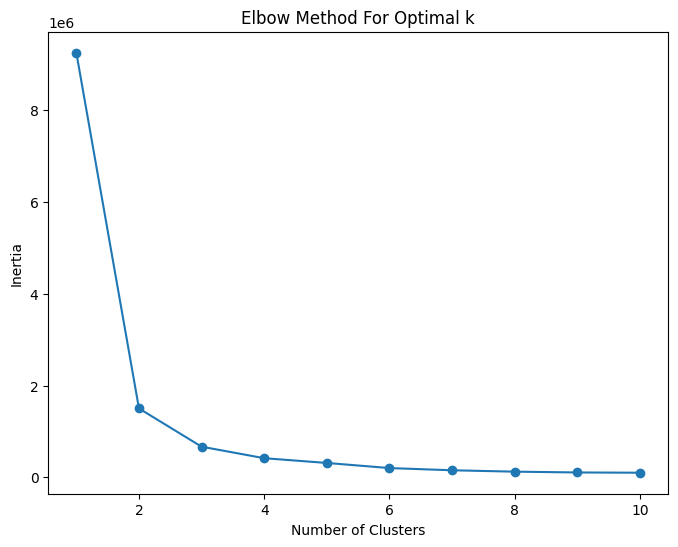

In [37]:
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Option 1: Set the number of CPU cores to use (Suppresses the warning)
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Set to the number of cores you want to use

# Finding the optimal number of clusters using the Elbow Method
inertia = []
range_clusters = range(1, 11)  # Test for 1 to 10 clusters

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(combined_data)  # Fit on the combined data
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to visualize the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



### Clustering (K-Means Algorithm)

In [38]:
# Based on the elbow plot, choose the optimal number of clusters 
num_clusters = 3  # Adjust based on the elbow plot

# Step 4: Perform K-Means clustering without scaling
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_cleaned.loc[:, 'combined_cluster'] = kmeans.fit_predict(combined_data)


Silhouette Score for 3 clusters: 0.7460481561120664


In [46]:
combined_data

array([[  0.,   0.,   0., ..., 155.,  12.,   8.],
       [  0.,   0.,   0., ..., 191.,   3.,   4.],
       [  0.,   0.,   0., ..., 192.,  11.,   8.],
       ...,
       [  0.,   0.,   0., ...,  68.,   3.,   8.],
       [  0.,   0.,   0., ...,  68.,  12.,   8.],
       [  0.,   0.,   0., ...,  68.,  11.,   1.]], shape=(869, 5005))

In [47]:
# Optional: Evaluate clustering performance using Silhouette Score
silhouette_avg = silhouette_score(combined_data, df_cleaned['combined_cluster'])
print(f'Silhouette Score for {num_clusters} clusters: {silhouette_avg}')

Silhouette Score for 3 clusters: 0.7460481561120664


#### A Silhouette Score of 0.746 for 3 clusters indicates a good clustering result. The Silhouette Score ranges from -1 to +1, where:

+1 indicates that the samples are very well clustered.
0 indicates that the samples are on or very close to the decision boundary between clusters.
-1 indicates that the samples are incorrectly clustered.

In [39]:
df_cleaned

,System (Level 1),Subsystem (Level 2),Component (Level 3),Summary,Description,Failure_Mode,Root_Cause,Environment,FFF Framework,text_combined,System (Level 1)_encoded,Subsystem (Level 2)_encoded,Component (Level 3)_encoded,Environment_encoded,FFF Framework_encoded,combined_cluster
0,Headrest Assembly,Face Cradle,Face Cradle Plate,E-Stop on table 1231545400003 doesn't trigger ...,During provisioning E-Stop didn’t work on tabl...,"E-Stop didn’t work on table 1231545400003, pin...",Armrest cable connector not being fully plugge...,Testing,Function,E-Stop on table 1231545400003 doesn't trigger ...,5,12,155,12,8,2
1,Camera Assembly,Linkage System,Headrest Vertical,DVT Build | Torque value adjustment for 690-00...,"MFG-000006, Page.8\n\nThe torque values for 69...",The torque values are too big and will risk da...,torque values are too big,Field Operation,Form,DVT Build | Torque value adjustment for 690-00...,2,21,191,3,4,2
2,Armrest Assembly,Linear Actuator,Headrest Wiper Seal,DVT- Touchpoint dovetail not installed properl...,One left touchpoint (T0XS2426000031) was not i...,One left touchpoint was not installed with the...,Unknown root cause,Production,Function,DVT- Touchpoint dovetail not installed properl...,1,20,192,11,8,2
3,Leg Bolster,Ball Screw,Headrest Wire,Franka UI incorrectly reporting that e-stop is...,Context:\n[<slack conversation>|https://aescap...,Franka UI incorrectly reporting that e-stop is...,Unknown root cause,Product Engineering,Function,Franka UI incorrectly reporting that e-stop is...,7,3,193,10,8,2
4,Matress,ToF Camera,Headrest Pin,DVT012 - Left dovetail installed on right arm,This arm was tagged as a right arm but had a l...,right touch point could not be installed to th...,arm was tagged as a right arm but had a left d...,Installation,Function,DVT012 - Left dovetail installed on right arm ...,8,30,188,5,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,Apparel,Armrest Cushion,Bolt,Design for Install,No description provided,Design for Install,Unknown root cause,Production,Fit,Design for Install No description provided Des...,0,0,68,11,1,1
957,Apparel,Armrest Cushion,Bolt,Bellows Improvements,No description provided,Bellows Improvements,Unknown root cause,Production,Form,Bellows Improvements No description provided B...,0,0,68,11,4,1
958,Apparel,Armrest Cushion,Bolt,Massage Tickling Member,"On occasion, it has been reported that the mas...",uncomfortable for the member,massage can result in a tickling feeling.,Field Operation,Function,"Massage Tickling Member On occasion, it has be...",0,0,68,3,8,1
959,Apparel,Armrest Cushion,Bolt,Franka Self Test Failures (HW),No description provided,Franka Self Test Failures (HW),Unknown root cause,Testing,Function,Franka Self Test Failures (HW) No description ...,0,0,68,12,8,1


In [40]:
df_cleaned.to_csv('df_cleaned03prev.csv', index=False)

### Similarity Measure

In [43]:
# Step 5: Similarity Calculation - Cosine Similarity for new issues
new_issue_text = "Problem with the armrest actuator. It does not respond during adjustment."  # Example new issue text
new_issue_tfidf = tfidf_vectorizer.transform([new_issue_text])

# label encode categorical values for the new issue
new_issue_categorical = np.array([[6, 15, 107, 9, 3]])  # encoded values ( actual values)

# Combine the new issue's textual and categorical features
new_issue_combined = np.hstack([new_issue_tfidf.toarray(), new_issue_categorical])

# Compute cosine similarity between the new issue and the existing dataset
similarity_scores = cosine_similarity(new_issue_combined, combined_data)

# Display the most similar issues
most_similar_idx = similarity_scores.argsort()[0][-10:]  # Top 10 most similar issues
print("Top 10 most similar issues to the new issue:")
print(df_cleaned.iloc[most_similar_idx][['text_combined', 'combined_cluster']])

Top 5 most similar issues to the new issue:
                                        text_combined  combined_cluster
1   DVT Build | Torque value adjustment for 690-00...                 2
26  DVT Build | Incoming material issue - Particle...                 2
27  COMPAL | 600-000752 Gauge required for dimensi...                 2
28  COMPAL | 600-000753 | Armrest Bezel Gasket, pa...                 2
0   E-Stop on table 1231545400003 doesn't trigger ...                 2
15  TONO | 600-000639 | Investigate: threaded hole...                 1
2   DVT- Touchpoint dovetail not installed properl...                 2
4   DVT012 - Left dovetail installed on right arm ...                 2
6   Armrest cable chain is loose once assembled Du...                 2
10  TONO | MFG-000054 | SOP update urgently requir...                 2


### Dimensionality Reduction (PCA)

In [44]:
# Step 6: PCA for Dimensionality Reduction (for visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_data)

# Create a DataFrame for PCA components and cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['combined_cluster'] = df_cleaned['combined_cluster']

### Visualization

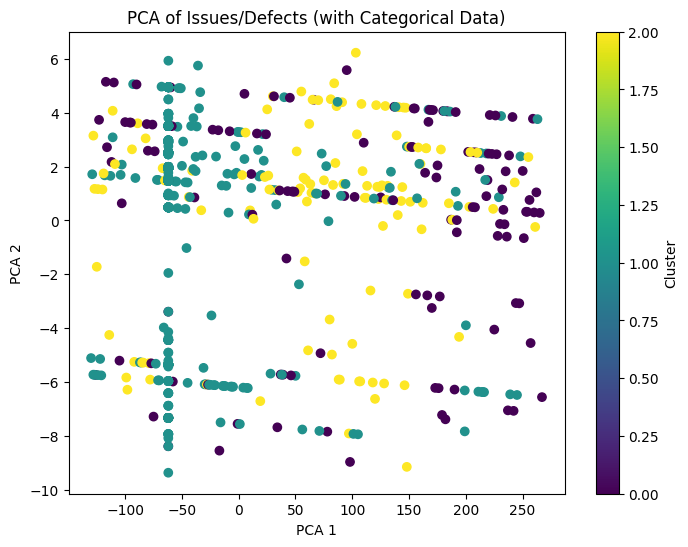

In [45]:
# Step 6: Visualizing Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['combined_cluster'], cmap='viridis', marker='o')
plt.title('PCA of Issues/Defects (with Categorical Data)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


<center><b> THANK YOU</b></center>
